# **TP01: Régression linéaire**


In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
import numpy as np

## **Partie 1: Regression simple**

**METHODE1**

Génération de l'ensemble D:

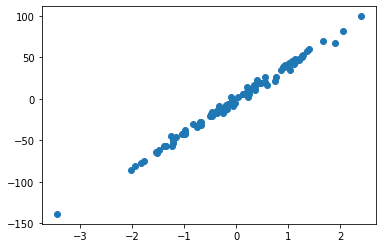

In [ ]:
x,y=make_regression(n_samples=100,n_features=1,noise=3)
plt.scatter(x,y)

Calcul des différentes valeurs caractérisant l'ensemble de données

Moyenne: 0.01641074086283327
Variance: 1.039509618975965
Ecart-type: 1.0195634452921334
Covariance: 1.039509618975965
Coefficient de corrélation: 0.997016696520347


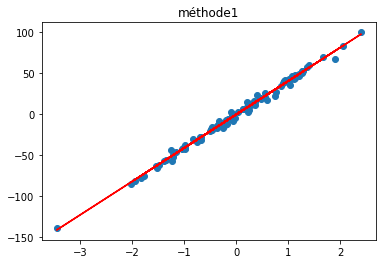

**METHODE2**

**Fonction model(X,theta)**

In [ ]:
y=y.reshape(y.shape[0],1)
theta=np.random.randn(2,1)
X=np.hstack((x,np.ones(x.shape)))
def model(X,theta):
  matrice=X.dot(theta)  
  return matrice

**Fonction grad(X, y, theta)**

In [ ]:
def grad(X,Y,theta):
  m=len(y)
  return  X.T.dot(model(X,theta)-Y)*(1/m)

In [ ]:
gradient=grad(X,y,theta)
gradient

array([[-42.67029157],
       [  1.26614513]])

**Fonction descente de gradient**

In [ ]:
def descente_grad(X,Y,theta,pas,iterations):
    for i in range(iterations):
        theta=theta-pas*grad(X,Y,theta)
    return theta

In [ ]:
theta=descente_grad(X,y,theta,0.001,500000)
theta

array([[40.69354926],
       [-0.41411318]])

**Représentation de la regression linéaire**

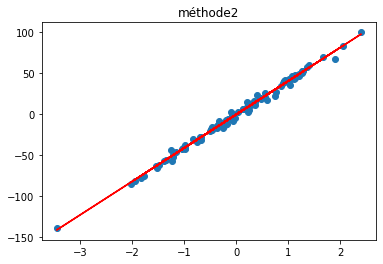

In [ ]:
plt.title('méthode2')
plt.scatter(X[:,0],y)
plt.plot(X[:,0],theta[0]*X[:,0]+theta[1],c='red')

**Calcul du coefficient de détermination**

Sans utiliser de la bibliothèque sickit learn

In [ ]:
f=model(X,theta)
RSE=sum((f-y)**2) /sum((y-moyy)**2)
R=1-RSE
print(f"le cofficient de détermination est: {R}")

le cofficient de détermination est: [0.99404229]


En utilisant la bibliothèque sckit learn

In [ ]:
from sklearn.linear_model import LinearRegression
Regression_model=LinearRegression()
Regression_model.fit(x,y)
R=Regression_model.score(x,y)
print(f"le cofficient de détermination est: {R}")

le cofficient de détermination est: 0.994042293140345


## **Partie 2: Regression multiple**

**Génération du jeu de données** 

In [ ]:
#génération du jeu de données 
x,y=make_regression(n_samples=100,n_features=5,noise=3)

#ajouter a x une colonne remplie de 1 
x=np.concatenate((x,np.ones((x.shape[0],1))),axis=1)
x


**solution 1** 

In [ ]:
#calcul des coefficients 
B = np.linalg.inv(x.T.dot(x)).dot(x.T).dot(y)
prediction = x.dot(B)
prediction.reshape(prediction.shape[0], 1)
prediction

In [ ]:
R = sum((prediction - np.mean(y))**2)/sum((y-np.mean(y))**2)
R

array([0.99382198])

**solution 2 Descente de gradient dans le cas multiple**

In [ ]:
(2*(x.T.dot(y))).shape

(6,)

In [ ]:
(x.T.dot(x).dot(theta)).shape

(6, 1)

In [ ]:
theta=np.random.randn(6,1)
theta

array([[-3.1182376 ],
       [-1.02878971],
       [-1.45498546],
       [-0.7944503 ],
       [-1.16478531],
       [ 0.37824076]])

**Fonction gradient dans le cas multiple**

In [ ]:
def grad_multiple(x,y,theta):
  return (-2*(x.T.dot(y))).reshape(6,1)+2*(x.T.dot(x).dot(theta)) 

In [ ]:
grad_multiple(x,y,theta)

array([[-17626.89264158],
       [-11635.31903922],
       [-10432.97297652],
       [-10422.2403395 ],
       [-22598.79431805],
       [  3221.19433522]])

**Fonction descente de gradient dans le cas multiple**

In [ ]:
def descente_grad_multiple(X,Y,theta,pas,iterations):
  for i in range(iterations):
        theta=theta-pas*grad_multiple(X,Y,theta)
  return theta

In [ ]:
theta=descente_grad_multiple(x,y,theta,0.001,500000)

In [ ]:
theta

array([[80.04568268],
       [41.20017074],
       [47.15341282],
       [70.58807388],
       [92.72979616],
       [-0.17737614]])

In [ ]:
model(x,theta)

**Calcul du coefficient R**

sans utiliser la bibliothèque 

In [ ]:
R = sum((model(X,theta) - np.mean(y))**2)/sum((y-np.mean(y))**2)
R

array([0.99907531])

en utilisant la bibliothèque

In [ ]:
from sklearn.linear_model import LinearRegression

model_sklearn = LinearRegression()
model_sklearn.fit(x,y)
model_sklearn.score(x,y)

0.9990753149383946